### In this dataset we have to predict the income of people that they earn more than 50k or less than 50k.

In [1]:
#Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset.

df=pd.read_csv('adult_income.csv',  sep=',\s')
df.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race',
              'sex','capital_gain','capital_loss','hours_per_week','native_country','income']
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
df.shape

(32560, 15)

Observation:
    
     There are 32560 rows and 15 columns in our dataset.

In [4]:
#Checking for null values.
df.isnull().values.any()

False

Observation:
    
    Here we see there are no null values but there is a '?' present in our dataset which is treated as null value.

In [5]:
#Checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education_num     32560 non-null int64
marital_status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital_gain      32560 non-null int64
capital_loss      32560 non-null int64
hours_per_week    32560 non-null int64
native_country    32560 non-null object
income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observation:
    
    Information of the dataset shows that there are no missing values. But in the dataset '?' is present. So I will 
    encode '?' as NaN value. 

In [6]:
#Replacing the question mark with NaN
df = df.replace('?',np.nan ) 
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [7]:
#Checking for null values again.
df.isnull().values.any()

True

Now it tells that nan value is present.

Now we check the no of null values present in particular columns.

In [8]:
#Checking for null values.
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Observation:
    
    1-There are 1836 null values present in workclass columns.
    
    2-1843 null value present in occupation column.
    
    3-583 null value present in native_country.
    
We can also see these values via visualization with the help of heatmap.

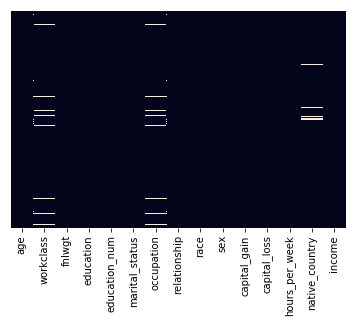

In [9]:
#Checking it via visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [10]:
#Checking the information of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         30724 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education_num     32560 non-null int64
marital_status    32560 non-null object
occupation        30717 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital_gain      32560 non-null int64
capital_loss      32560 non-null int64
hours_per_week    32560 non-null int64
native_country    31977 non-null object
income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observation:
    
    The summary shows that the variables - workclass, occupation and native_country contain missing values.
    
    All of these variables are categorical data type. So, I will impute the missing values with the most frequent 
    value i.e.mode.


In [11]:
#Imputing the missing value with mode 

for col in ['workclass', 'occupation', 'native_country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
#Now again checking for missing values.
df.isnull().values.any()

False

Now our null values is removed. we can see it via visualization.

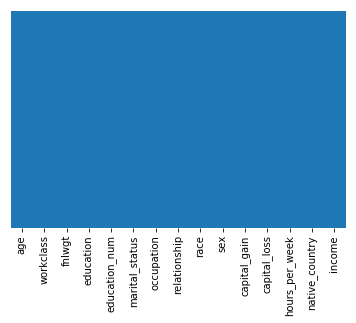

In [13]:
#Now again check it via visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20')
plt.show()

### Now our data is ready for Visualization without any missing values.

In [14]:
#Putting the data into Pandas DataFrame

df_income=pd.DataFrame(df)
df_income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [15]:
#Checking the various columns.
df_income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [16]:
#Checking the data types of the columns
df_income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Observation:
    
    Numeric features
    numeric_features = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']

    Categorical features:
    categorical_features =['workclass','education','marital_status', 'occupation', 'relationship', 'race', 'sex',
                           'native_country,'income']

### For Analyzing the data with target i.e. income we have to change income into numeric type.

In [17]:
#Changing the data type of target column.

df_income['income'] = df_income['income'].map({'<=50K': 0, '>50K': 1}) 
df_income['income'].dtypes

dtype('int64')

In [18]:
df_income['income'].unique()

array([0, 1], dtype=int64)

Observation:
    
    Here 1 stands for greater than 50k and 0 stands for less than equal to 50k.

# Summary Statistics

In [19]:
df_income.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Observation:
    
    1-Minimum age is 17 years and maximum age is 90 years in our data set.
    
    2-Minimum education_num is 1 and maximum is 16.
    
    3-Minimum hours_per_week is 1 and maximum is 99 hours_per_week.
    
    4-In age,fnlwgt,education_num,capital_gain,capital_loss attributes mean is greater than median therefore in these     
      
      attributes data is Right skewed.
      
    5-Difference between 75% and max is higher in age,fnlwgt,capital_gain,capital_loss and hours_per_week therefore outliers
    
      present in these column which we have to remove it.

# Exploring Data Variables

In [20]:
#Printing the object data types and their unique values

for column in df_income.columns:
    if df_income[column].dtype==object:
        print(str(column) + ' : ' + str(df_income[column].unique()))
        print(df_income[column].value_counts())
        print('******************************************************************************')
        print('\n')

workclass : ['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
******************************************************************************


education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dty

Here we see the summary of the categorical columns. 

## To check the correlation

In [21]:
df_cor=df_income.corr()
df_cor

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


Here we can see the correlation between the columns.

For Better understanding we can see it via visualization(with the help of heatmap).

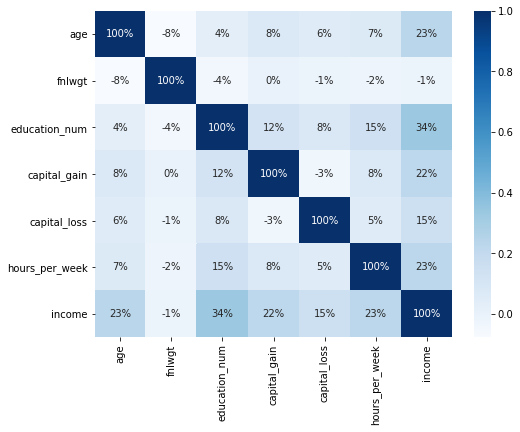

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df_cor,annot=True,fmt='.0%',cmap='Blues')
plt.show()

Text(0.5,1,'Correlation with target Variable')

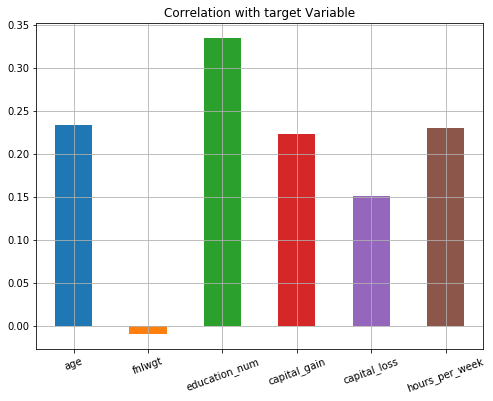

In [23]:
plt.figure(figsize=(8,6))
df_income.drop('income', axis=1).corrwith(df_income['income']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("Correlation with target Variable")

Observation:
    
    1-fnlwgt is only negatively correlated with target variable income.
    
    2-education number is highly correlated with target variable among all input variables.

# Data Visualization

Our feature variable of interest is income.

It refers to the monthly income of the people.

We already change it integer valued as it contains only two number 0 and 1.

1 stands for greater than 50k

0 stands for less than equal to 50k

## Univariate Analysis

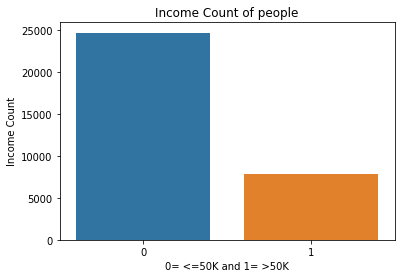

0    24719
1     7841
Name: income, dtype: int64


In [24]:
#Checking income count of people.
plt.subplots(figsize=(6,4))
sns.countplot(x="income", data=df_income)
plt.title("Income Count of people")
plt.xlabel('0= <=50K and 1= >50K')
plt.ylabel("Income Count")
plt.show()

print(df_income.income.value_counts())

Observation:

    1-24719 peoples income is less than equal to 50k.

    2-Only 7841 people getting income more than 50k.



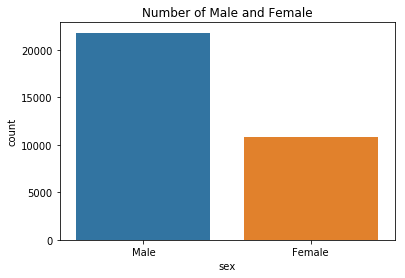

Male      21789
Female    10771
Name: sex, dtype: int64


In [25]:
#Checking number of male and female.
plt.subplots(figsize=(6,4))
sns.countplot(x="sex", data=df_income)
plt.title("Number of Male and Female")
plt.show()

print(df_income.sex.value_counts())

Observation:
    
     There are 21789 male and 10771 Female

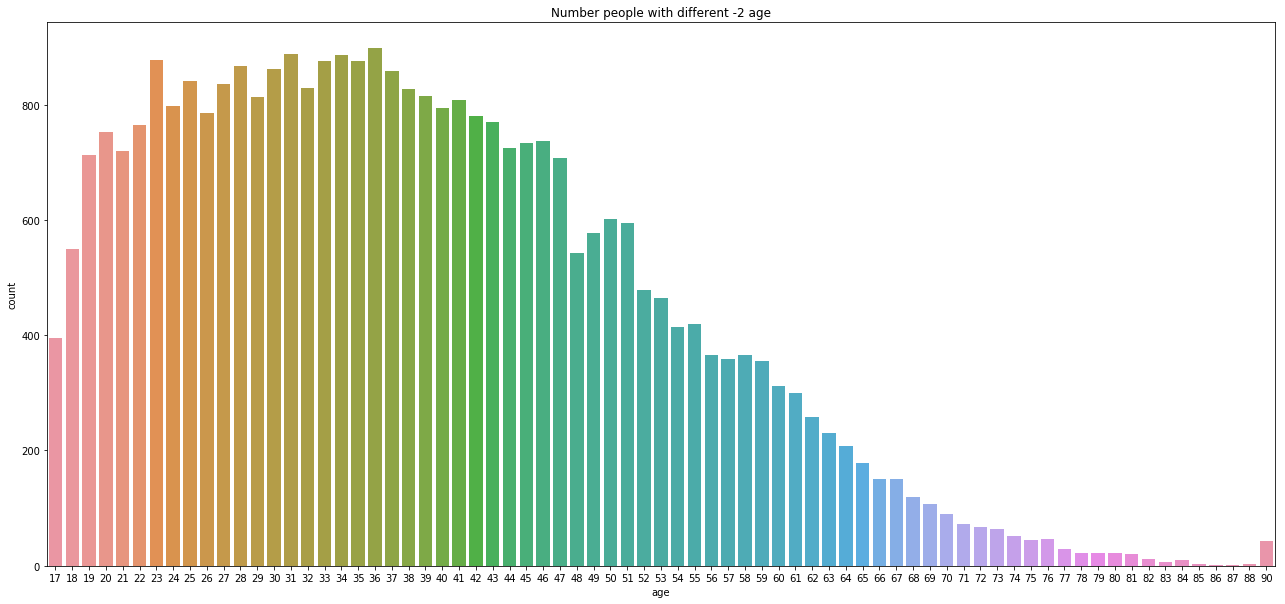

In [26]:
#Checking number of people with different-2 age group.
plt.subplots(figsize=(22,10))
sns.countplot(x="age", data=df_income)
plt.title("Number people with different -2 age")
plt.show()

Observation:
    
    1-Maximum people is age of 36 years i.e 898.
    
    2-Only one people is age of 86 and 87 years.
    
    3- There are 43 peoples of age 90 years which is highest age group of our data set.

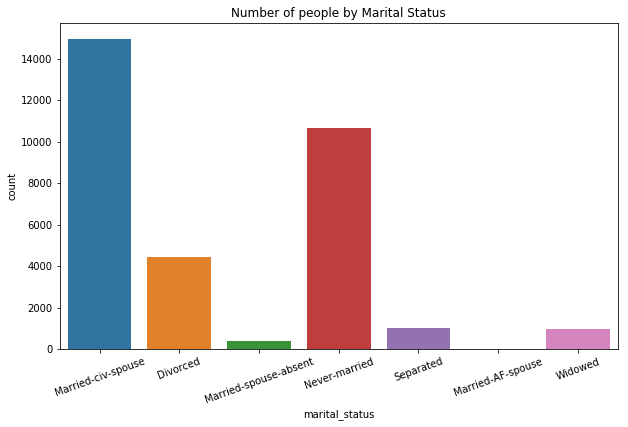

Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64


In [27]:
# Marital_Status of people
plt.subplots(figsize=(10,6))
sns.countplot(x="marital_status", data=df_income)
plt.title("Number of people by Marital Status")
plt.xticks(rotation=20)
plt.show()

print(df_income.marital_status.value_counts())

Findings:
    
    Here we see the marital status of peoples that how many Seprated and how many divorced and others status.

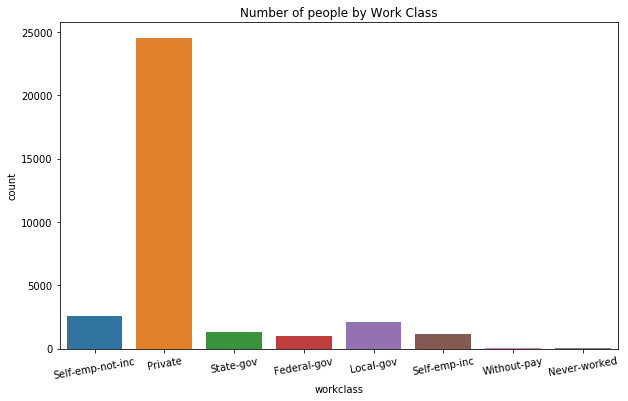

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


In [28]:
# Work_Class of people
plt.subplots(figsize=(10,6))
sns.countplot(x="workclass", data=df_income)
plt.title("Number of people by Work Class")
plt.xticks(rotation=10)
plt.show()

print(df_income.workclass.value_counts())

Findings:
    
    Above are the work place of peoples.
    
    24532 people is doing job in Private Sector and 7 people never worked.

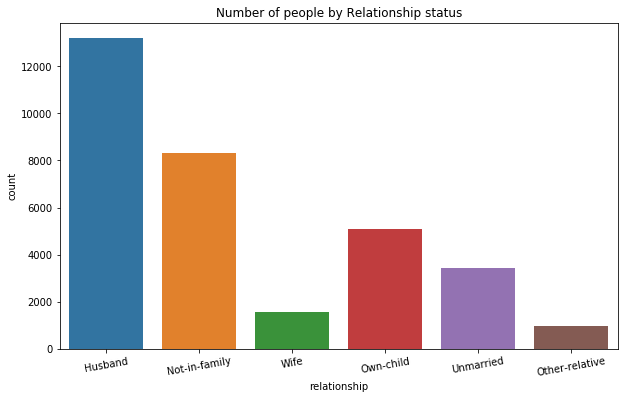

Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


In [29]:
#Relationship status of people
plt.subplots(figsize=(10,6))
sns.countplot(x="relationship", data=df_income)
plt.title("Number of people by Relationship status")
plt.xticks(rotation=10)
plt.show()

print(df_income.relationship.value_counts())

Findings:
    
    Here we see the relationship status of the peoples.

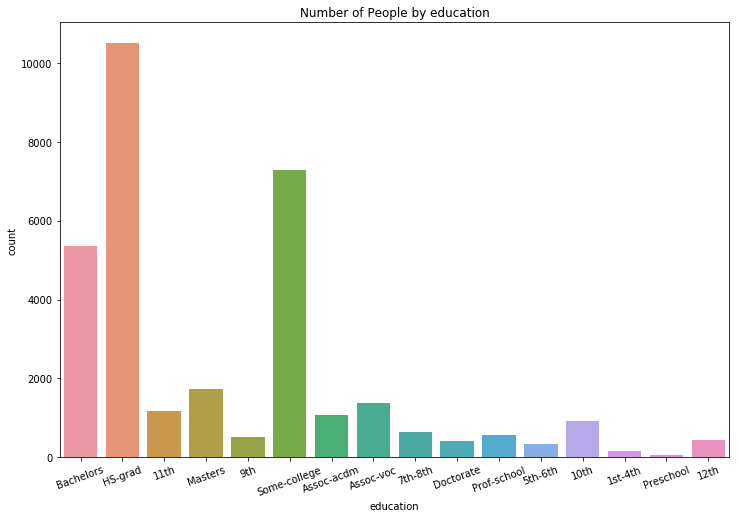

HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


In [30]:
#Checking the number of people by education
plt.subplots(figsize=(12,8))
sns.countplot(x="education", data=df_income)
plt.title("Number of People by education")
plt.xticks(rotation=20)
plt.show()

print(df_income.education.value_counts())

Findings:
    
    1-Here we saw the counting of people by education.
    
    2-Maximum number of people i.e.10501 has studied in HS-grad and only few are i.e. 51 has studided at Preschool level.

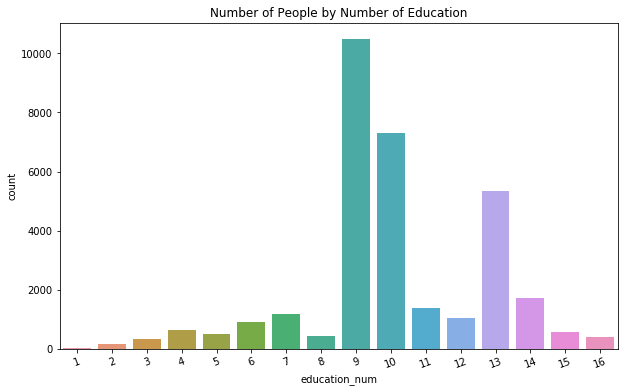

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64


In [31]:
#Checking the number of people by education number.
plt.subplots(figsize=(10,6))
sns.countplot(x="education_num", data=df_income)
plt.title("Number of People by Number of Education")
plt.xticks(rotation=20)
plt.show()

print(df_income.education_num.value_counts())

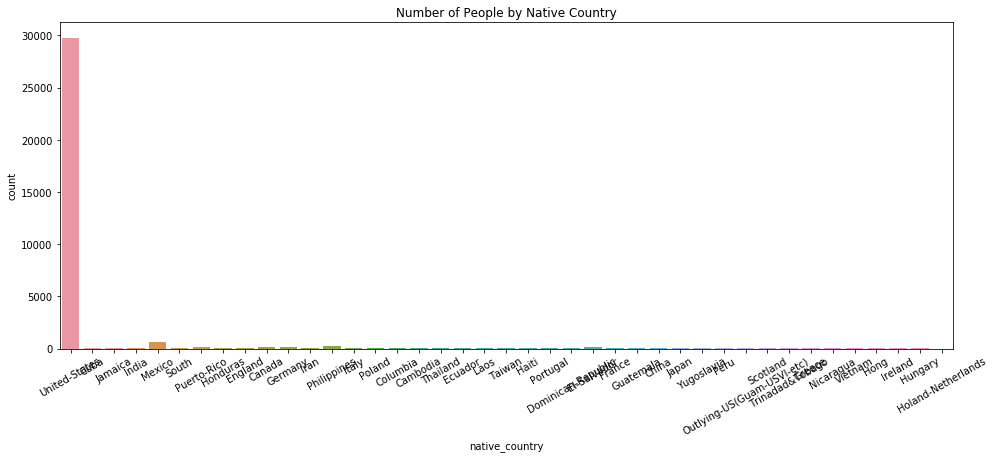

United-States                 29752
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [32]:
#Checking the number of people by Native Country
plt.subplots(figsize=(16,6))
sns.countplot(x="native_country", data=df_income)
plt.title("Number of People by Native Country")
plt.xticks(rotation=30)
plt.show()

print(df_income.native_country.value_counts())

Findings:
    
    Here maximum people are from USA and only one is from Holand_Netherlands.

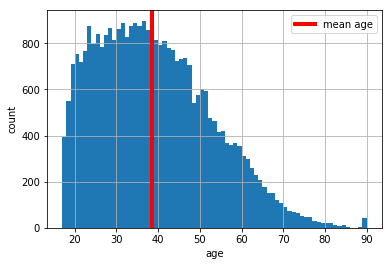

In [33]:
#Checking the mean of age group

ages = df_income['age'].hist(bins=max(df_income['age']-min(df_income['age'])))
mean_val = np.mean(df_income['age'])
plt.axvline(mean_val,linewidth=4,  color='red', label='mean age')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

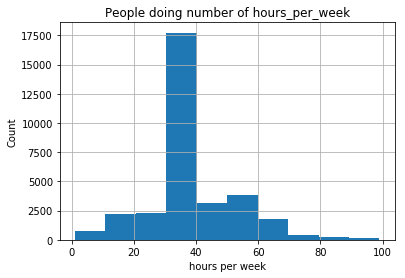

In [34]:
#Checking number of hours_per_week
df_income['hours_per_week'].hist()
plt.xlabel('hours per week')
plt.ylabel('Count')
plt.title("People doing number of hours_per_week")
plt.show()

Observation:
    
    Approx. 17500 people doing 30 to 40 hours_per_week.

## Bivariate Analysis

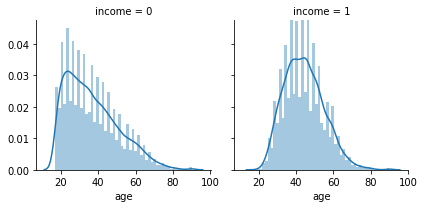

In [35]:
# Exploring Age vs Income via FaceGrid
facet = sns.FacetGrid(df_income, col='income')
facet.map(sns.distplot, "age")
plt.show()

### Sex vs Income

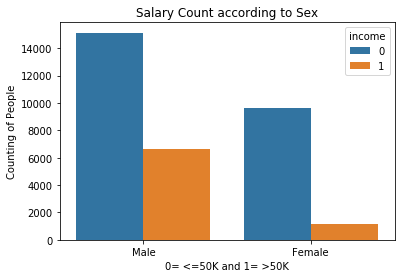

sex     income
Female  0          9592
        1          1179
Male    0         15127
        1          6662
Name: income, dtype: int64


In [36]:
sns.countplot(x="sex",hue='income',data=df_income)
plt.title("Salary Count according to Sex")
plt.xlabel('0= <=50K and 1= >50K')
plt.ylabel('Counting of People')
plt.show()


print(df_income.groupby('sex')['income'].value_counts())

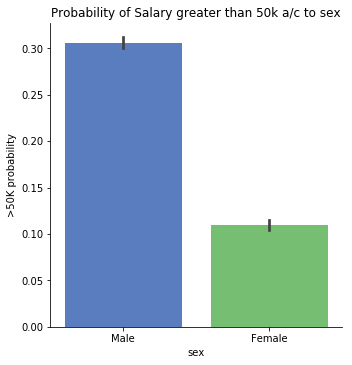

In [37]:
#factor plot of Sex vs income
sns.factorplot(x="sex",y="income",data=df_income,kind="bar",size = 5,palette = "muted",aspect=1)
plt.title('Probability of Salary greater than 50k a/c to sex')
plt.ylabel(">50K probability")
plt.show()

Findings:
    
    Only 30% male and 11% female got salary more than 50k.

### Education vs Income

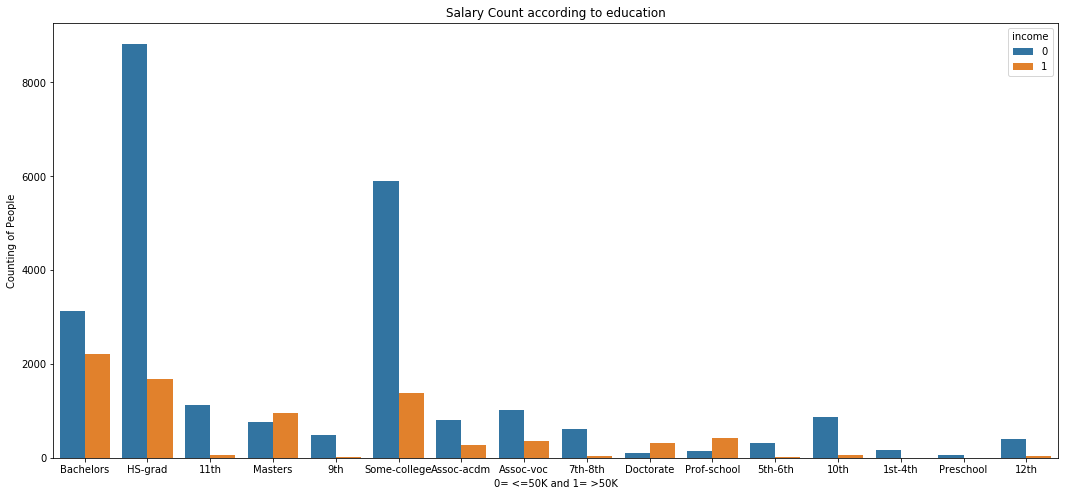

education     income
10th          0          871
              1           62
11th          0         1115
              1           60
12th          0          400
              1           33
1st-4th       0          162
              1            6
5th-6th       0          317
              1           16
7th-8th       0          606
              1           40
9th           0          487
              1           27
Assoc-acdm    0          802
              1          265
Assoc-voc     0         1021
              1          361
Bachelors     0         3133
              1         2221
Doctorate     1          306
              0          107
HS-grad       0         8826
              1         1675
Masters       1          959
              0          764
Preschool     0           51
Prof-school   1          423
              0          153
Some-college  0         5904
              1         1387
Name: income, dtype: int64


In [38]:
plt.subplots(figsize=(18,8))
sns.countplot(x="education",hue='income',data=df_income)
plt.title("Salary Count according to education")
plt.xlabel('0= <=50K and 1= >50K')
plt.ylabel('Counting of People')
plt.show()


print(df_income.groupby('education')['income'].value_counts())

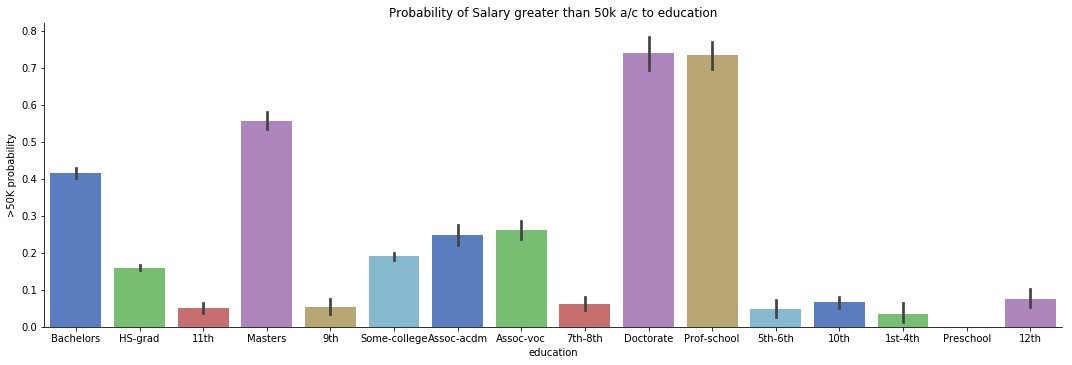

In [39]:
#Factorplot of Education vs Income
sns.factorplot(x="education",y="income",data=df_income,kind="bar",size = 5,palette = "muted",aspect=3)
plt.title('Probability of Salary greater than 50k a/c to education')
plt.ylabel(">50K probability")
plt.show()

Findings:
    
    Approximately 75% Doctorate and Prof-school professional got salary more than 50k.

### Education_Num vs Income

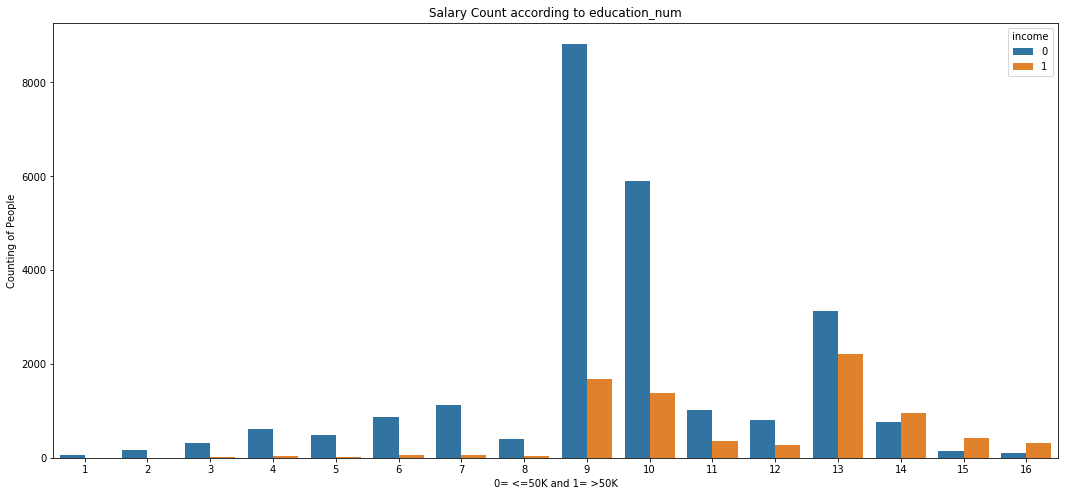

education_num  income
1              0           51
2              0          162
               1            6
3              0          317
               1           16
4              0          606
               1           40
5              0          487
               1           27
6              0          871
               1           62
7              0         1115
               1           60
8              0          400
               1           33
9              0         8826
               1         1675
10             0         5904
               1         1387
11             0         1021
               1          361
12             0          802
               1          265
13             0         3133
               1         2221
14             1          959
               0          764
15             1          423
               0          153
16             1          306
               0          107
Name: income, dtype: int64


In [40]:
plt.subplots(figsize=(18,8))
sns.countplot(x="education_num",hue='income',data=df_income)
plt.title("Salary Count according to education_num")
plt.xlabel('0= <=50K and 1= >50K')
plt.ylabel('Counting of People')
plt.show()


print(df_income.groupby('education_num')['income'].value_counts())

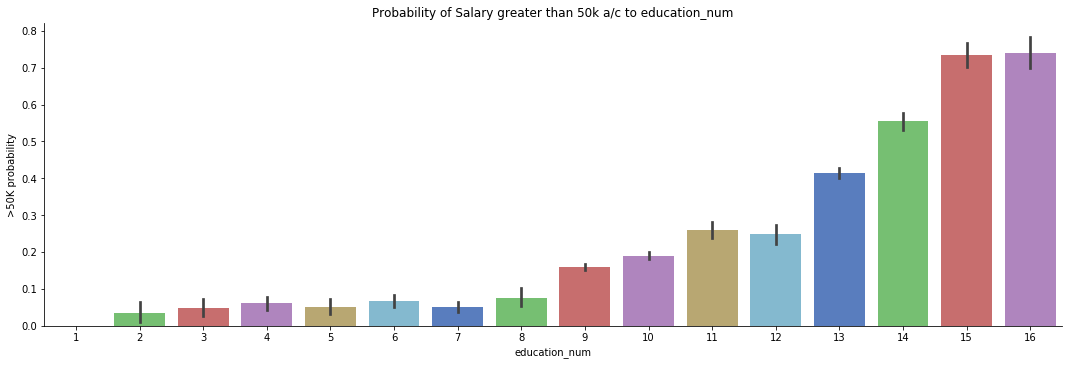

In [41]:
#Factorplot for education and income
sns.factorplot(x="education_num",y="income",data=df_income,kind="bar",size = 5,palette = "muted",aspect=3)
plt.title('Probability of Salary greater than 50k a/c to education_num')
plt.ylabel(">50K probability")
plt.show()

### Relationship vs Income

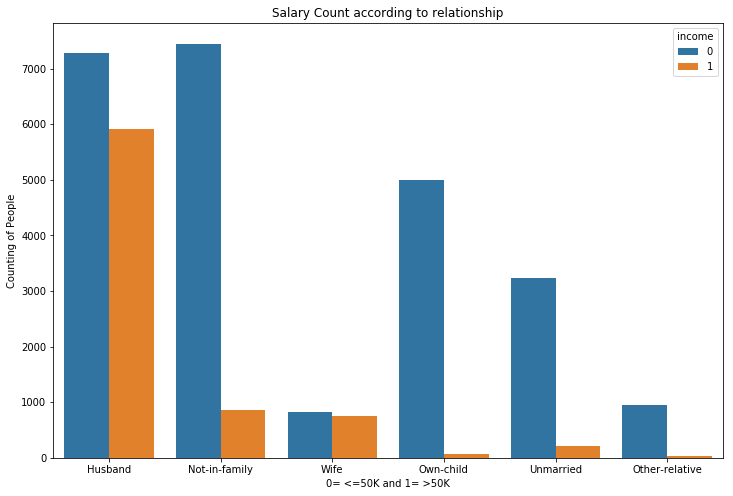

relationship    income
Husband         0         7275
                1         5918
Not-in-family   0         7448
                1          856
Other-relative  0          944
                1           37
Own-child       0         5001
                1           67
Unmarried       0         3228
                1          218
Wife            0          823
                1          745
Name: income, dtype: int64


In [42]:
plt.subplots(figsize=(12,8))
sns.countplot(x="relationship",hue='income',data=df_income)
plt.title("Salary Count according to relationship")
plt.xlabel('0= <=50K and 1= >50K')
plt.ylabel('Counting of People')
plt.show()


print(df_income.groupby('relationship')['income'].value_counts())

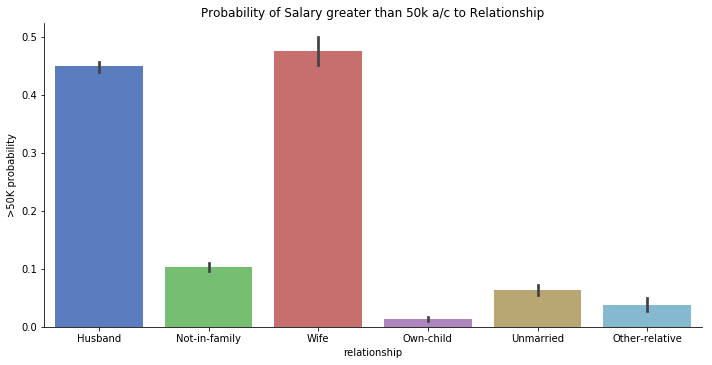

In [43]:
sns.factorplot(x="relationship",y="income",data=df_income,kind="bar",size = 5,palette = "muted",aspect=2)
plt.title('Probability of Salary greater than 50k a/c to Relationship')
plt.ylabel(">50K probability")
plt.show()

### Workclass vs Income

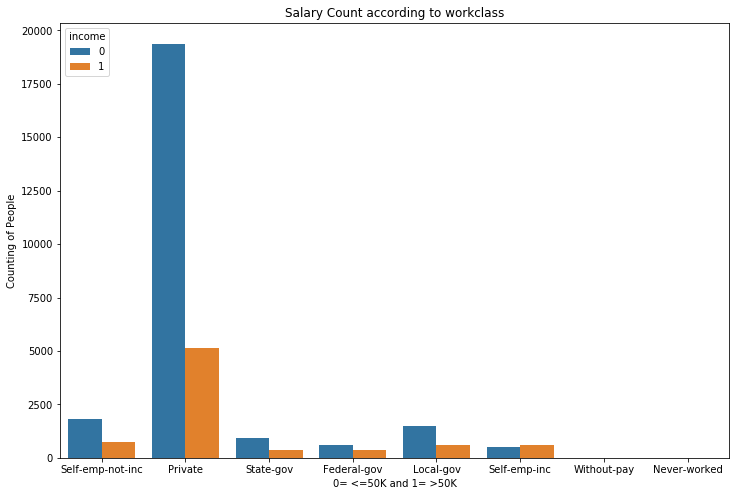

workclass         income
Federal-gov       0           589
                  1           371
Local-gov         0          1476
                  1           617
Never-worked      0             7
Private           0         19378
                  1          5154
Self-emp-inc      1           622
                  0           494
Self-emp-not-inc  0          1817
                  1           724
State-gov         0           944
                  1           353
Without-pay       0            14
Name: income, dtype: int64


In [44]:
plt.subplots(figsize=(12,8))
sns.countplot(x="workclass",hue='income',data=df_income)
plt.title("Salary Count according to workclass")
plt.xlabel('0= <=50K and 1= >50K')
plt.ylabel('Counting of People')
plt.show()


print(df_income.groupby('workclass')['income'].value_counts())

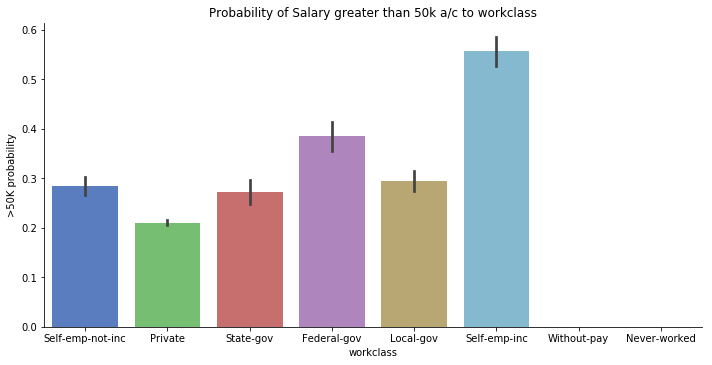

In [45]:
sns.factorplot(x="workclass",y="income",data=df_income,kind="bar",size = 5,palette = "muted",aspect=2)
plt.title('Probability of Salary greater than 50k a/c to workclass')
plt.ylabel(">50K probability")
plt.show()

Findings:
    
    55% of Self-emp-inc got salary more than 50k.

### Native country vs Income

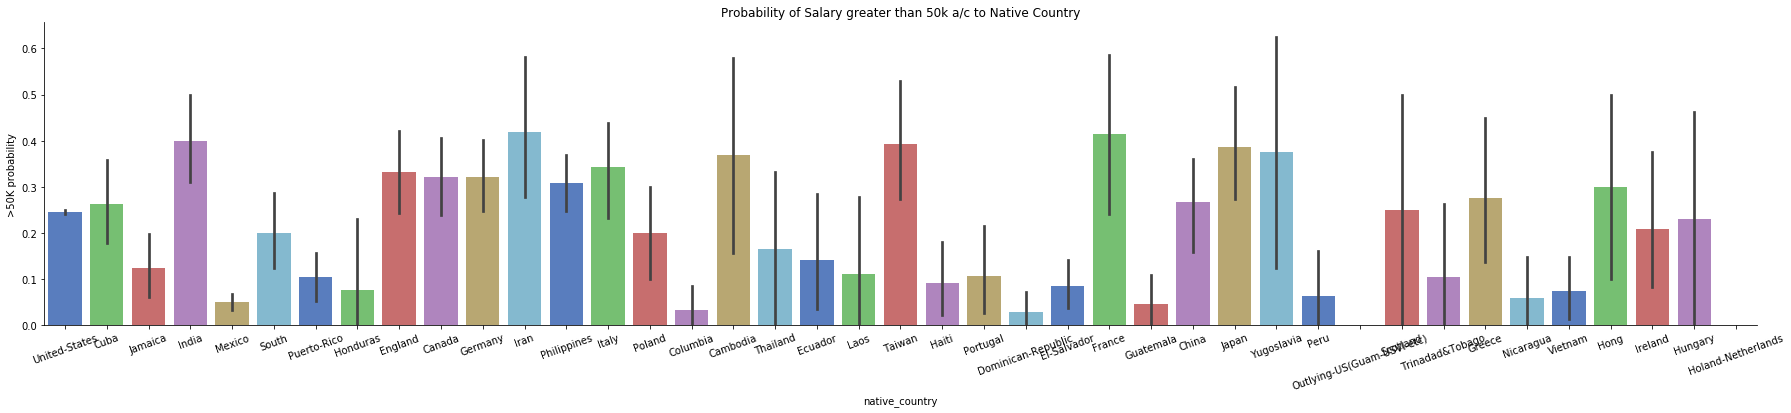

In [46]:
sns.factorplot(x="native_country",y="income",data=df_income,kind="bar",size = 5,palette = "muted",aspect=5)
plt.title('Probability of Salary greater than 50k a/c to Native Country')
plt.xticks(rotation=20)
plt.ylabel(">50K probability")
plt.show()

## Multivariate Analysis

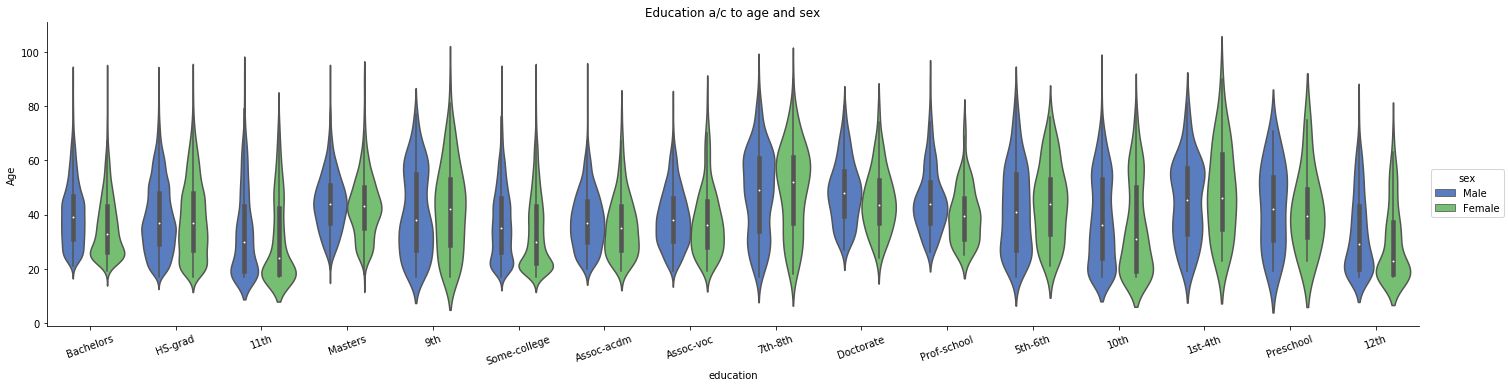

In [47]:
sns.factorplot(x="education",y="age",hue='sex',data=df_income,kind="violin",size = 5,palette = "muted",aspect=4)
plt.title('Education a/c to age and sex')
plt.xticks(rotation=20)
plt.ylabel("Age")
plt.show()

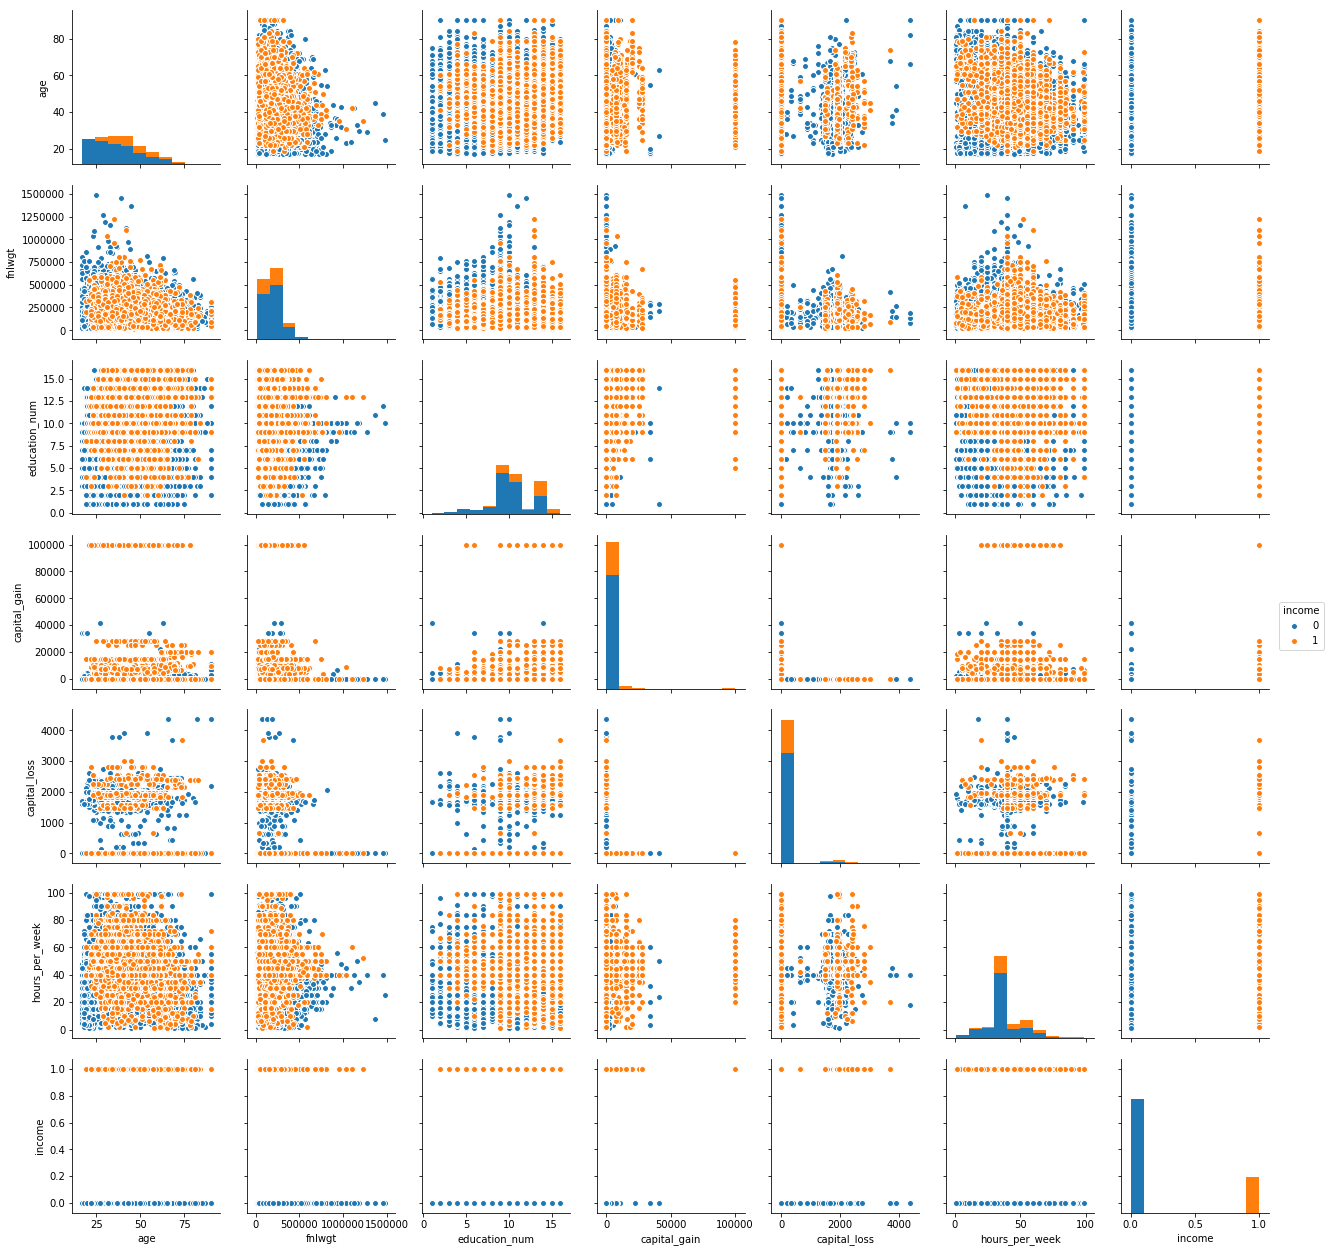

In [48]:
sns.pairplot(df_income,hue='income')

## Checking skewness

In [49]:
#Checking the skewness
df_income.skew()

age                0.558738
fnlwgt             1.446972
education_num     -0.311630
capital_gain      11.953690
capital_loss       4.594549
hours_per_week     0.227636
income             1.212383
dtype: float64

In [50]:
#Treating Skewness via square root method and cube root method.
df_income.skew()
for col in df_income.skew().index:
    if col in df_income.describe().columns:
        if df_income[col].skew()>0.55:
            df_income[col]=np.sqrt(df_income[col])
        if df_income[col].skew()<-0.55:
            df_income[col]=np.cbrt(df_income[col])

In [51]:
#Again checking the skewness.
df_income.skew()

age               0.204335
fnlwgt            0.189066
education_num    -0.311630
capital_gain      5.894949
capital_loss      4.376279
hours_per_week    0.227636
income            1.212383
dtype: float64

## Converting the categorical data into numeric variables

In [52]:
# Transform Non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df_income.columns:
    if df_income[column].dtype==np.number:
        continue
    df_income[column]=le.fit_transform(df_income[column])

In [53]:
df_income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,7.071068,5,288.636450,9,12,2,3,0,4,1,0.0,0.0,12,38,0.0
1,6.164414,3,464.377002,11,8,0,5,1,4,1,0.0,0.0,39,38,0.0
2,7.280110,3,484.480134,1,6,2,5,0,2,1,0.0,0.0,39,38,0.0
3,5.291503,3,581.729318,9,12,2,9,5,2,0,0.0,0.0,39,4,0.0
4,6.082763,3,533.462276,12,13,2,3,5,4,0,0.0,0.0,39,38,0.0


## Plotting Outliers

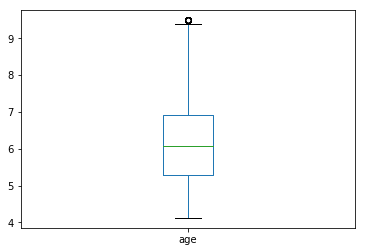

In [54]:
df_income['age'].plot.box()

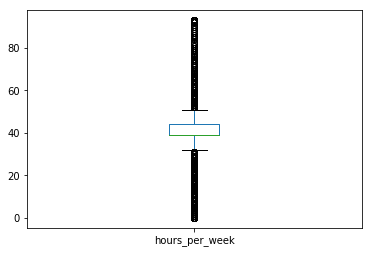

In [55]:
df_income['hours_per_week'].plot.box()

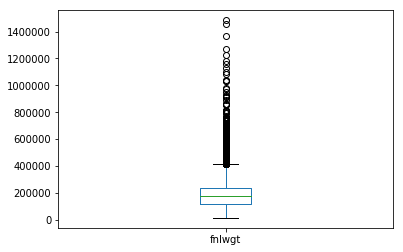

In [56]:
df['fnlwgt'].plot.box()

Observation:

     There are some outliers are present in our data which we have to remove it.



# Removing Outliers

In [57]:
from scipy.stats import zscore
z=np.abs(zscore(df_income))
z

array([[0.87717289, 1.72133587, 1.08850574, ..., 2.25444135, 0.26137428,
        0.5632099 ],
       [0.04529753, 0.08522344, 0.3801927 , ..., 0.03112222, 0.26137428,
        0.5632099 ],
       [1.06897372, 0.08522344, 0.54819853, ..., 0.03112222, 0.26137428,
        0.5632099 ],
       ...,
       [1.3769523 , 0.08522344, 0.24342694, ..., 0.03112222, 0.26137428,
        0.5632099 ],
       [1.30712916, 0.08522344, 0.2506509 , ..., 1.67802528, 0.26137428,
        0.5632099 ],
       [1.00565793, 0.81805622, 0.98367672, ..., 0.03112222, 0.26137428,
        1.77553698]])

In [58]:
threshold=3
print(np.where(z>3))

(array([    3,     7,     9, ..., 32550, 32552, 32559], dtype=int64), array([13, 10, 12, ...,  8,  8, 10], dtype=int64))


In [59]:
new_income=df_income[(z<3).all(axis=1)]

In [60]:
#Checking the shape
print(df_income.shape,'\t\t',new_income.shape)

(32560, 15) 		 (27561, 15)


In [61]:
df_income=new_income
df_income.shape

(27561, 15)

# Model Training

In [62]:
df_income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,7.071068,5,288.636450,9,12,2,3,0,4,1,0.0,0.0,12,38,0.0
1,6.164414,3,464.377002,11,8,0,5,1,4,1,0.0,0.0,39,38,0.0
2,7.280110,3,484.480134,1,6,2,5,0,2,1,0.0,0.0,39,38,0.0
4,6.082763,3,533.462276,12,13,2,3,5,4,0,0.0,0.0,39,38,0.0
5,7.000000,3,400.233682,6,4,3,7,1,2,0,0.0,0.0,15,22,0.0


In [63]:
#Splitting the data into input and output variable.
x=df_income.drop(columns=['income'],axis=1)
x.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,7.071068,5,288.636450,9,12,2,3,0,4,1,0.0,0.0,12,38
1,6.164414,3,464.377002,11,8,0,5,1,4,1,0.0,0.0,39,38
2,7.280110,3,484.480134,1,6,2,5,0,2,1,0.0,0.0,39,38
4,6.082763,3,533.462276,12,13,2,3,5,4,0,0.0,0.0,39,38
5,7.000000,3,400.233682,6,4,3,7,1,2,0,0.0,0.0,15,22


In [64]:
y=df_income['income']
y.head()

0    0.0
1    0.0
2    0.0
4    0.0
5    0.0
Name: income, dtype: float64

In [65]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(27561, 14) 		 (27561,)


In [66]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [67]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [68]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(22048, 14) 		 (5513, 14)


In [69]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(22048,) 	 (5513,)


In [70]:
#Importing all the model Library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

## Finding the best parameters

In [71]:
#Using GridSearchCV to find out the best parameter in LogisticRegression

parameters={'C':[1,10],'random_state':range(42,100)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 10, 'random_state': 42}


In [72]:
#Using GridSearchCV to find out the best parameter in KNeighborsClassifier

parameters={'n_neighbors':range(22,25)}
knn=KNeighborsClassifier()

clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 24}


In [73]:
#Models with its best parameters

LR=LogisticRegression(random_state=42)
KNN=KNeighborsClassifier(n_neighbors=24)
SVC=SVC()

In [74]:
# All Algorithm by using for loop

model=[LR,GaussianNB(),SVC,DecisionTreeClassifier(),KNN]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*****************************************************************************************')
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) is:
0.8311264284418647
[[4144  202]
 [ 729  438]]
             precision    recall  f1-score   support

        0.0       0.85      0.95      0.90      4346
        1.0       0.68      0.38      0.48      1167

avg / total       0.82      0.83      0.81      5513

*****************************************************************************************


Accuracy score of GaussianNB(priors=None) is:
0.7796118265916924
[[3452  894]
 [ 321  846]]
             precision    recall  f1-score   support

        0.0       0.91      0.79      0.85      4346
        1.0       0.49      0.72      0.58      1167

avg / total       0.82      0.78      0.79      5513

*******************************************************

In [75]:
#Cross Validate the models

models=[LR,GaussianNB(),SVC,DecisionTreeClassifier(),KNN]
for m in models:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print("Model:",m)
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('************************************************************************************************')
    print('\n')

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Score: [0.82299601 0.8226333  0.82843671 0.82480958 0.82438316 0.83236575
 0.81748911 0.82540835 0.82540835 0.82431942]
Mean Score: 0.8248249731686046
Standard deviation: 0.003646956753609447
************************************************************************************************


Model: GaussianNB(priors=None)
Score: [0.76967719 0.77801959 0.7867247  0.7729416  0.76342525 0.7841074
 0.77177068 0.78039927 0.79564428 0.79201452]
Mean Score: 0.7794724490203343
Standard deviation: 0.009753503559080593
************************************************************************************************


Model: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto

Above all models SVC is giving best score.

Now we use some boosting technique to boostup our score.

After that we decide that which model is best.

## Using Ensemble Technique to boostup our score

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [77]:
# All Algorithm by using for loop

model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*****************************************************************************************')
    print('\n')

Accuracy score of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) is:
0.8425539633593325
[[4057  289]
 [ 579  588]]
             precision    recall  f1-score   support

        0.0       0.88      0.93      0.90      4346
        1.0       0.67      0.50      0.58      1167

avg / total       0.83      0.84      0.83      5513

*****************************************************************************************


Accuracy score of AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None) is:
0.8550698349356067
[[4103  243]
 [ 556  611]]
          

In [78]:
#Cross Validate the Boosting models

models=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in models:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print("Model:",m)
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('************************************************************************************************')
    print('\n')

Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Score: [0.83242655 0.83822996 0.84838593 0.84040624 0.83599419 0.83236575
 0.84687954 0.84355717 0.84936479 0.84065336]
Mean Score: 0.8408263471205192
Standard deviation: 0.005887159071443901
************************************************************************************************


Model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
Score: [0.85237577 0.84838593 0.86507073 0.84548422 0.85921626 0.85595065
 0.85921626 0.86424682 0.86315789 0.85553539]
Mean Score: 0.85686399214297

Gradient Boosting Classifier Gives best score and it is not suffering from underfitting and overfitting.

So we choose Gradient Boosting Classifier as our best model.

In [79]:
#GradientBoostClassifier with best result

gbc=GradientBoostingClassifier(learning_rate=0.1,random_state=59,n_estimators=200)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.863595138762924
[[4117  229]
 [ 523  644]]
             precision    recall  f1-score   support

        0.0       0.89      0.95      0.92      4346
        1.0       0.74      0.55      0.63      1167

avg / total       0.86      0.86      0.86      5513



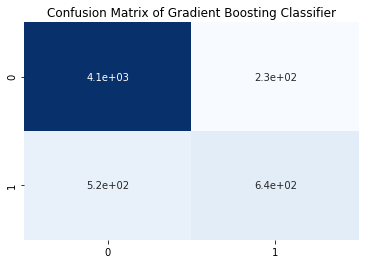

In [80]:
#Plotting Confusion Matrix for Gradient Boosting Classifier.
cm=confusion_matrix(y_test,predgbc)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')

plt.title("Confusion Matrix of Gradient Boosting Classifier")
plt.show()

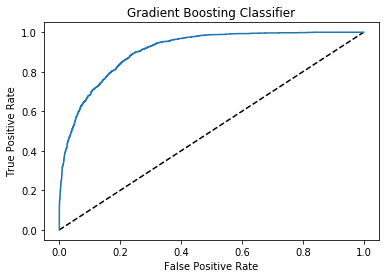

0.7495751000338736


In [81]:
#AUC_ROC Curve  and finding auc score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=gbc.predict_proba(x_test)[:,1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier')
plt.show()

auc_score=roc_auc_score(y_test,predgbc)
print(auc_score)

In [82]:
#Saving this model
from sklearn.externals import joblib

#Save the model as a pickle in a file
joblib.dump(gbc,'Adult_income_gbc.pkl')

['Adult_income_gbc.pkl']